[![Open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nunososorio/SingleCellGenomics2024/blob/main/challenges/space_race_II.ipynb)


<img src="https://github.com/nunososorio/SingleCellGenomics2024/blob/main/logo.png?raw=true" alt="AnnData" style="width:600px; height:auto;"/>

## SINGLE CELL SPACE RACE II

Organize in teams.
Setup your environment running the code bellow

In [2]:
!wget https://github.com/nunososorio/SingleCellGenomics2024/raw/main/challenges/Toy_data.h5ad
!pip install scanpy loompy umap-learn scrublet louvain > _
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import scrublet as scr
import loompy
import os
adata=sc.read_h5ad('Toy_data.h5ad')

--2024-04-10 18:49:29--  https://github.com/nunososorio/SingleCellGenomics2024/raw/main/challenges/Toy_data.h5ad
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nunososorio/SingleCellGenomics2024/main/challenges/Toy_data.h5ad [following]
--2024-04-10 18:49:29--  https://raw.githubusercontent.com/nunososorio/SingleCellGenomics2024/main/challenges/Toy_data.h5ad
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6447030 (6.1M) [application/octet-stream]
Saving to: ‘Toy_data.h5ad.1’

Toy_data.h5ad.1     100%[===================>]   6.15M  --.-KB/s    in 0.08s   

2024-04-10 18:49:30 (72.7 MB/s) - ‘Toy_

/usr/local/lib/python3.10/dist-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/usr/local/lib/python3.10/dist-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/usr/local/lib/python3.10/dist-packages/loompy/bus_file.py:1

Visit https://b.socrative.com/login/student/

Enter NSO in the room name and wait for the questions to show (one login per team)

# Question 1
## How many cell clusters appear to be present?
### Please note the following parameters: use a random seed of 42, recall that 8 was selected as the number of relevant Principal Components, employ the Euclidean metric, and apply a Louvain resolution of 0.2.

In [2]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_counts = 100) #Playing conservative with this one
print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 50000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 40) # Would go for 1000 but might cut out too many cells
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_genes = 7000) # Would go for 1000 but might cut out too many cells
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))


Total number of cells: 5887
Number of cells after min count filter: 5193
Number of cells after max count filter: 5193
Number of cells after gene filter: 5189
Number of cells after gene filter: 5189


In [3]:
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=25)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


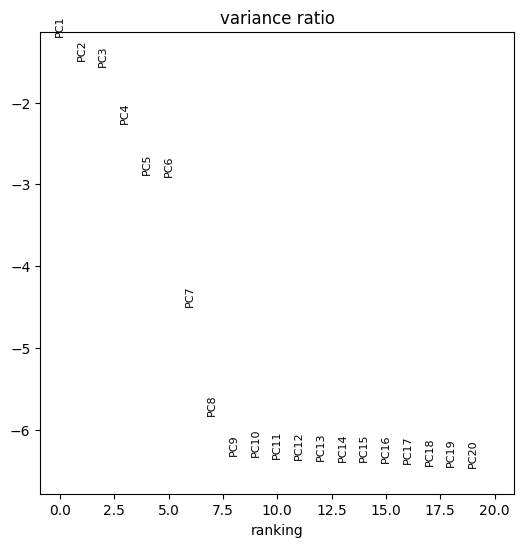

In [4]:
plt.rcParams['figure.figsize']=(6,6) #rescale figures

n_pcs=20
sc.pp.pca(adata, n_comps=n_pcs, use_highly_variable=True, svd_solver='arpack',random_state=42)
sc.pl.pca_variance_ratio(adata,n_pcs, log=True)

In [5]:
sc.pp.neighbors(adata,n_pcs=8,random_state=42, metric='euclidean')
sc.tl.umap(adata,random_state=42)


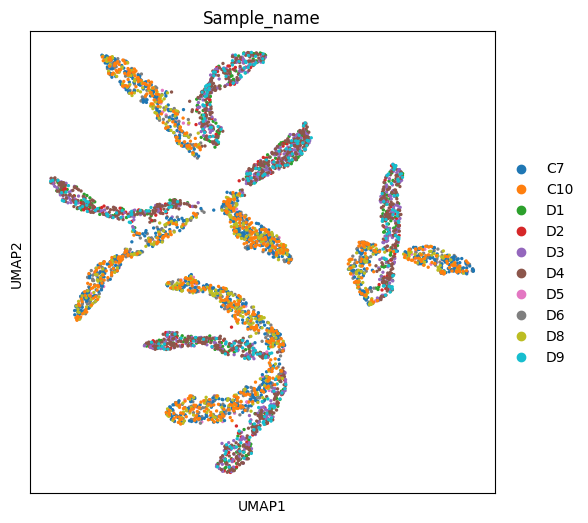

In [6]:
sc.pl.umap(adata, color=['Sample_name'])

In [7]:
sc.tl.louvain(adata, resolution=0.2, key_added='louvain_r0.2', random_state=42)

In [8]:
adata

AnnData object with n_obs × n_vars = 5189 × 126
    obs: 'barcode', 'Sample_name', 'Condition', 'n_counts', 'n_genes', 'louvain_r0.2'
    var: 'var_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'Sample_name_colors', 'louvain_r0.2'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

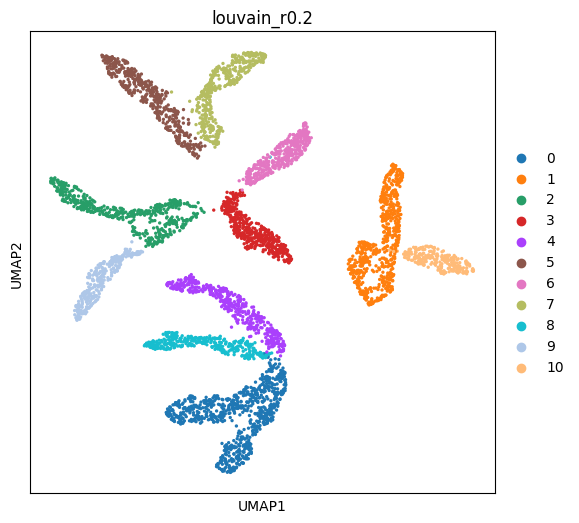

In [9]:
sc.pl.umap(adata, color=['louvain_r0.2'])

# Question 2
## How many cell types appear to be present?

### Hint: Refer to the dendrogram and identify genes that serve as cell type markers. You can get this information about marker genes from external sources.

In [10]:
sc.tl.rank_genes_groups(adata, groupby='louvain_r0.2', key_added='DE_02',method='wilcoxon',pts=True)

In [11]:
sc.tl.dendrogram(adata,groupby='louvain_r0.2')

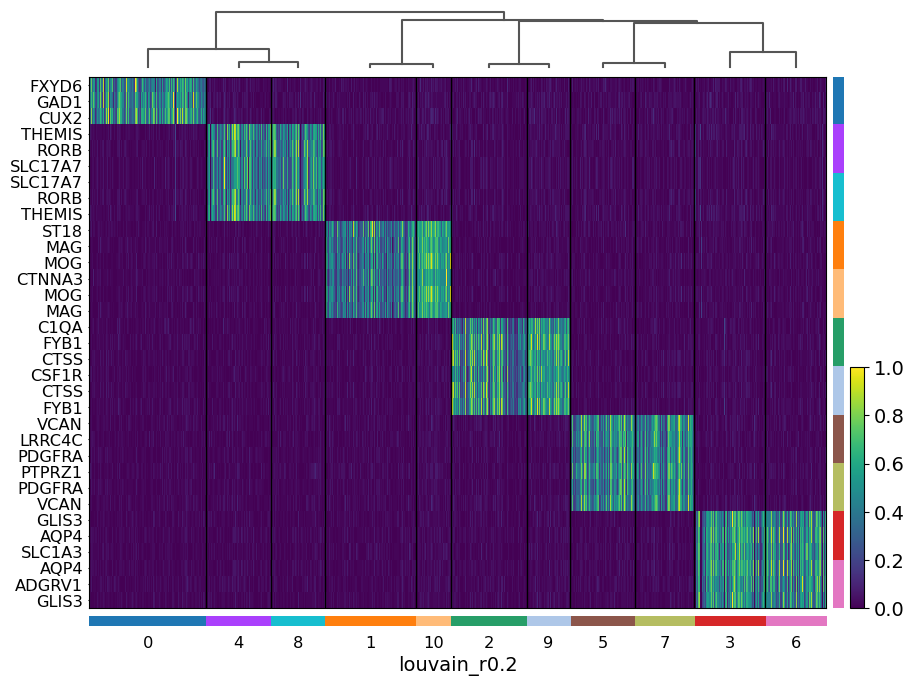

In [12]:
plt.rcParams.update({'font.size': 14})

sc.pl.rank_genes_groups_heatmap(adata, n_genes=3,
                                standard_scale='var',
                                groupby='louvain_r0.2',key='DE_02',
                                swap_axes=True,
                                figsize=(10,8),
                                show_gene_labels=True,
                                dendrogram=True)

# Question 3
## Given the samples labeled as `Sample_name` (ranging from D1 to C10), how many of these samples are from female individuals?

### Hint: Don’t just scratch the surface, dive deeper!


         Falling back to preprocessing with `sc.pp.pca` and default params.


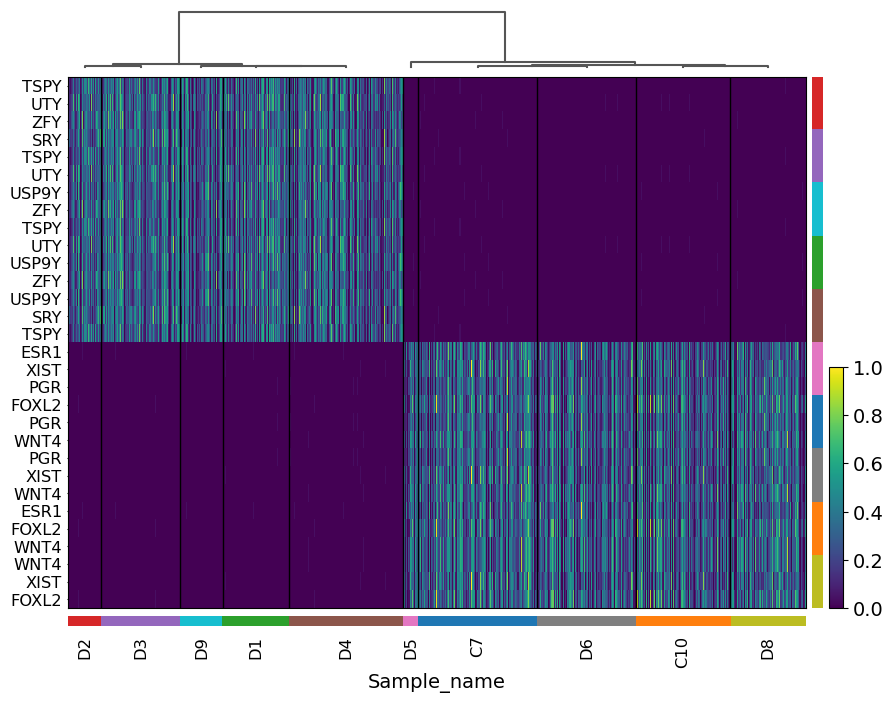

In [3]:
sc.tl.rank_genes_groups(adata, groupby='Sample_name', key_added='DE_Sample',method='wilcoxon',pts=True)
sc.tl.dendrogram(adata,groupby='Sample_name')

plt.rcParams.update({'font.size': 14})

sc.pl.rank_genes_groups_heatmap(adata, n_genes=3,
                                standard_scale='var',
                                groupby='Sample_name',key='DE_Sample',
                                swap_axes=True,
                                figsize=(10,8),
                                show_gene_labels=True,
                                dendrogram=True)
